# Bibliotecas

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lectura de datos

In [4]:
df_enfriado_natural = pd.read_csv("../Data/temperatura_celular_10-02-2026_17:27:15_natural.csv")
df_enfriado_ventilador = pd.read_csv("../Data/temperatura_celular_10-02-2026_18:14:52_ventilador.csv")
df_enfriado_aluminio = pd.read_csv("../Data/temperatura_celular_10-02-2026_18:49:08_aluminio.csv")
df_enfriado_hielos = pd.read_csv("../Data/temperatura_celular_10-02-2026_19:29:46_hielos.csv")
df_enfriado_sin_apps = pd.read_csv("../Data/temperatura_celular_10-02-2026_20:15:17_sin_apps.csv")
df_enfriado_natural.head()

,tiempo_s,temperatura_C
0,0.0,25.75
1,0.5,26.00
2,1.0,26.00
3,1.5,25.75
4,2.0,26.25


# Análisis de datos

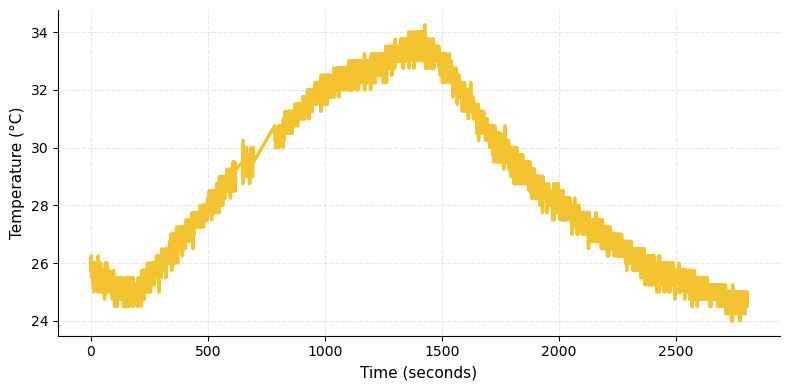

In [6]:
# Crear figura
plt.figure(figsize=(8, 4))

# Gráfica tiempo vs temperatura
plt.plot(
    df_enfriado_natural["tiempo_s"],
    df_enfriado_natural["temperatura_C"],
    linewidth=2.5,
    color="#F4C430"  # amarillo pastel (tipo golden)
)

# Etiquetas
plt.xlabel("Time (seconds)", fontsize=11)
plt.ylabel("Temperature (°C)", fontsize=11)

# Estilo ejecutivo
ax = plt.gca()
ax.set_facecolor("none")  # fondo transparente
plt.gcf().patch.set_alpha(0)

# Quitar marcos innecesarios
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Grid sutil
ax.grid(
    True,
    linestyle="--",
    alpha=0.3
)

plt.tight_layout()
plt.show()


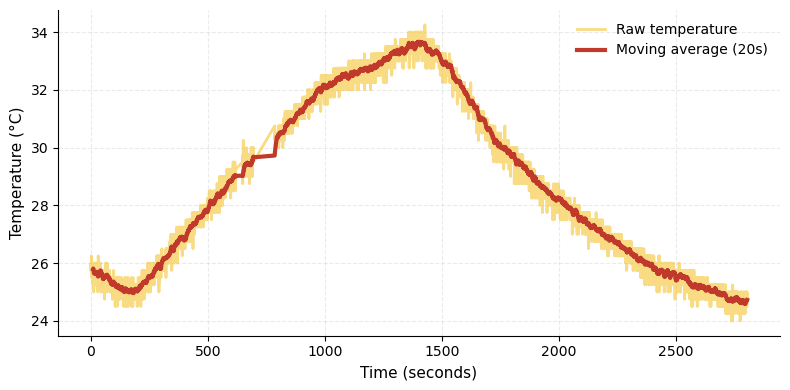

In [9]:
# Ventanas de medias móviles (ajústalas si quieres)
window_short = 5     # suavizado corto
window_long = 20     # tendencia general

# Cálculo de medias móviles
df_enfriado_natural["temp_ma_short"] = (
    df_enfriado_natural["temperatura_C"]
    .rolling(window=window_short)
    .mean()
)

df_enfriado_natural["temp_ma_long"] = (
    df_enfriado_natural["temperatura_C"]
    .rolling(window=window_long)
    .mean()
)

# Crear figura
plt.figure(figsize=(8, 4))

# Serie original
plt.plot(
    df_enfriado_natural["tiempo_s"],
    df_enfriado_natural["temperatura_C"],
    color="#F4C430",   # amarillo pastel
    linewidth=2,
    alpha=0.6,
    label="Raw temperature"
)

# Media móvil corta
# plt.plot(
#     df_enfriado_natural["tiempo_s"],
#     df_enfriado_natural["temp_ma_short"],
#     color="#FF8C42",   # naranja pastel
#     linewidth=2.5,
#     label=f"Moving average ({window_short}s)"
# )

# Media móvil larga
plt.plot(
    df_enfriado_natural["tiempo_s"],
    df_enfriado_natural["temp_ma_long"],
    color="#C0392B",   # rojo suave
    linewidth=3,
    label=f"Moving average ({window_long}s)"
)

# Etiquetas
plt.xlabel("Time (seconds)", fontsize=11)
plt.ylabel("Temperature (°C)", fontsize=11)

# Estilo ejecutivo
ax = plt.gca()
ax.set_facecolor("none")
plt.gcf().patch.set_alpha(0)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Grid sutil
ax.grid(True, linestyle="--", alpha=0.25)

# Leyenda limpia
plt.legend(frameon=False)

plt.tight_layout()
plt.show()


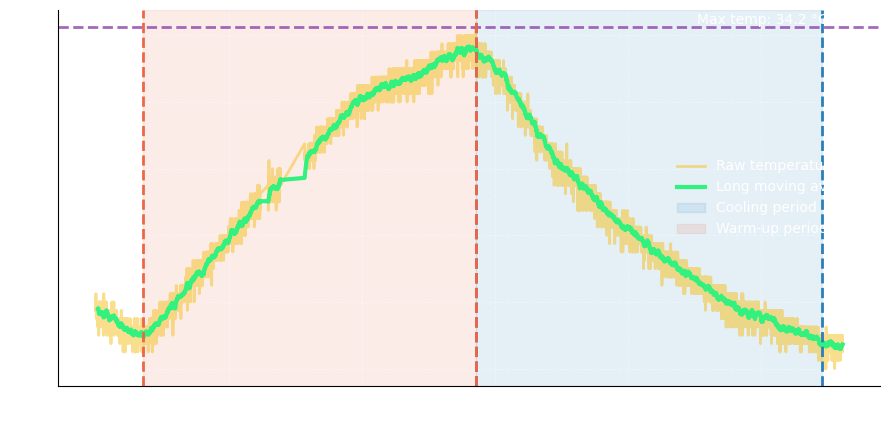

In [22]:
# =========================
# 1. Cálculos clave
# =========================

# Temperatura máxima
temp_max = df_enfriado_natural["temperatura_C"].max()
t_temp_max = df_enfriado_natural.loc[
    df_enfriado_natural["temperatura_C"].idxmax(), "tiempo_s"
]

# Definir periodo de enfriamiento (AJUSTA ESTOS VALORES)
t_inicio = t_temp_max           # inicio del enfriamiento
t_fin = t_temp_max + 1_300        # fin del enfriamiento (ejemplo: +300s)

# =========================
# 2. Medias móviles
# =========================

window_short = 5
window_long = 20

df_enfriado_natural["ma_short"] = (
    df_enfriado_natural["temperatura_C"]
    .rolling(window_short)
    .mean()
)

df_enfriado_natural["ma_long"] = (
    df_enfriado_natural["temperatura_C"]
    .rolling(window_long)
    .mean()
)

# =========================
# 3. Gráfica
# =========================

plt.figure(figsize=(9, 4.5))

# Serie original
plt.plot(
    df_enfriado_natural["tiempo_s"],
    df_enfriado_natural["temperatura_C"],
    color="#F4C430",
    linewidth=2,
    alpha=0.55,
    label="Raw temperature"
)

# # Medias móviles
# plt.plot(
#     df_enfriado_natural["tiempo_s"],
#     df_enfriado_natural["ma_short"],
#     color="#FF9F68",
#     linewidth=2.5,
#     label="Short moving average"
# )

plt.plot(
    df_enfriado_natural["tiempo_s"],
    df_enfriado_natural["ma_long"],
    color="#33F17F",
    linewidth=3,
    label="Long moving average"
)

# =========================
# 4. Indicadores clave
# =========================

# Línea horizontal: temperatura máxima
plt.axhline(
    y=temp_max,
    color="#8E44AD",
    linestyle="--",
    linewidth=2,
    alpha=0.8
)

plt.text(
    df_enfriado_natural["tiempo_s"].max() * 0.98,
    temp_max,
    f"Max temp: {temp_max:.1f} °C",
    ha="right",
    va="bottom",
    fontsize=10,
    color="white"
)

# Líneas verticales del periodo
plt.axvline(t_inicio, color="#2980B9", linestyle="--", linewidth=2)
plt.axvline(t_fin, color="#2980B9", linestyle="--", linewidth=2)

# Área sombreada del periodo de enfriamiento
plt.axvspan(
    t_inicio,
    t_fin,
    color="#2980B9",
    alpha=0.12,
    label="Cooling period"
)

t_inicio_calentamiento = 180
t_fin_calentamiento = t_temp_max

# Líneas verticales del periodo
plt.axvline(t_inicio_calentamiento, color="#EE6647", linestyle="--", linewidth=2)
plt.axvline(t_fin_calentamiento, color="#EE6647", linestyle="--", linewidth=2)

# Área sombreada del periodo de enfriamiento
plt.axvspan(
    t_inicio_calentamiento,
    t_fin_calentamiento,
    color="#EE6647",
    alpha=0.12,
    label="Warm-up period"
)

## =========================
# 5. Estilo ejecutivo (dark)
# =========================

plt.xlabel("Time (seconds)", fontsize=11, color="white")
plt.ylabel("Temperature (°C)", fontsize=11, color="white")

ax = plt.gca()
ax.set_facecolor("none")
plt.gcf().patch.set_alpha(0)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(axis="both", colors="white")
ax.grid(True, linestyle="--", alpha=0.3, color="white")

legend = plt.legend(frameon=False)
for text in legend.get_texts():
    text.set_color("white")

plt.tight_layout()
plt.show()


In [24]:
tiempo_enfriamiento = t_fin - t_inicio
print(f"Tiempo de enfriamiento: {tiempo_enfriamiento:.1f} s")

Tiempo de enfriamiento: 1300.0 s


# Comparación de enfriamiento

In [73]:
# ==========================================================
# EXECUTIVE COOLING COMPARISON PLOT
# - Manual start alignment per experiment
# - Moving averages
# - Black plotting area
# - Transparent outer background
# - English labels
# ==========================================================
def preparar_enfriamiento(df, start_time,
                           columna_tiempo='tiempo_s',
                           columna_temp='temperatura_C',
                           rolling_window=10):
    """
    Aligns experiment to chosen start_time and applies moving average.
    
    start_time: value inside the time column that you want to define as t = 0
    rolling_window: window size for moving average smoothing
    """
    
    df = df.copy()
    
    # Keep only data after selected start time
    df = df[df[columna_tiempo] >= start_time]
    
    # Align time to zero
    if pd.api.types.is_datetime64_any_dtype(df[columna_tiempo]):
        df['time_rel'] = (df[columna_tiempo] - start_time).dt.total_seconds()
    else:
        df['time_rel'] = df[columna_tiempo] - start_time
    
    # Moving average smoothing
    df['temp_smooth'] = df[columna_temp].rolling(
        window=rolling_window,
        min_periods=1
    ).mean()
    
    return df


def executive_cooling_plot(
    df_nat,
    df_vent,
    df_alu,
    df_hielo,
    df_sin,
    start_times,
    columna_tiempo='tiempo_s',
    columna_temp='temperatura_C',
    rolling_window=10
):
    """
    start_times: dictionary like:
    {
        "natural": value,
        "fan": value,
        "aluminum": value,
        "ice": value,
        "no_apps": value
    }
    """
    
    # Prepare data
    nat = preparar_enfriamiento(df_nat, start_times["natural"],
                                 columna_tiempo, columna_temp, rolling_window)
    vent = preparar_enfriamiento(df_vent, start_times["fan"],
                                  columna_tiempo, columna_temp, rolling_window)
    alu = preparar_enfriamiento(df_alu, start_times["aluminum"],
                                 columna_tiempo, columna_temp, rolling_window)
    hielo = preparar_enfriamiento(df_hielo, start_times["ice"],
                                   columna_tiempo, columna_temp, rolling_window)
    sin = preparar_enfriamiento(df_sin, start_times["no_apps"],
                                 columna_tiempo, columna_temp, rolling_window)
    
    # Create single figure
    fig = plt.figure(figsize=(10, 5))
    #fig.patch.set_alpha(0)  # Transparent outer background
    
    #ax = plt.gca()
    #ax.set_facecolor("#000000")  # Black plotting area
    ax = plt.gca()
    ax.set_facecolor("none")
    plt.gcf().patch.set_alpha(0)
    
    # Plot smoothed curves (no explicit colors used)
    plt.plot(nat['time_rel'], nat['temp_smooth'], label="Natural Cooling")
    plt.plot(vent['time_rel'], vent['temp_smooth'], label="Fan Cooling")
    plt.plot(alu['time_rel'], alu['temp_smooth'], label="Aluminum Surface")
    plt.plot(hielo['time_rel'], hielo['temp_smooth'], label="Ice Cooling")
    plt.plot(sin['time_rel'], sin['temp_smooth'], label="Closing Apps")
    
    # Styling text for black background
    plt.xlabel("Time since cooling started (s)", color="white")
    plt.ylabel("Temperature (°C)", color="white")
    plt.title("Cooling Comparison (Aligned & Smoothed)", color="white")
    
    plt.xticks(color="white")
    plt.yticks(color="white")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.tick_params(axis="both", colors="white")
    ax.grid(True, linestyle="--", alpha=0.3, color="white")
    
    legend = plt.legend(frameon=False)
    for text in legend.get_texts():
        text.set_color("white")
    
    plt.show()

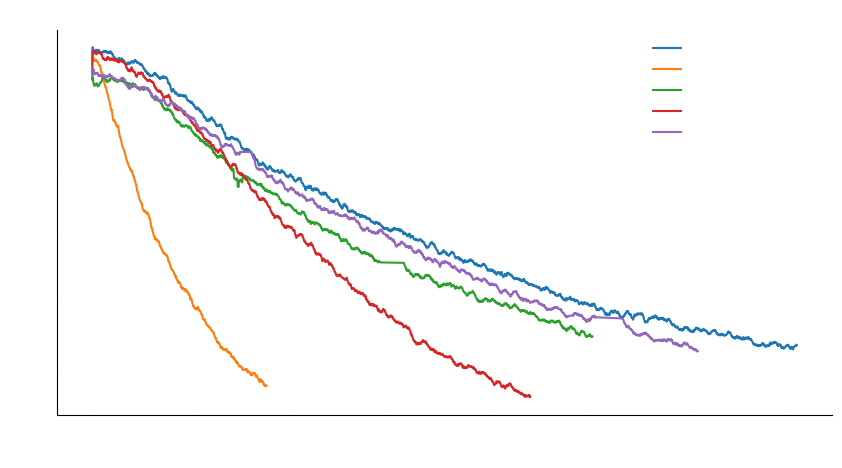

In [74]:
start_times = {
    "natural": 1_390,        # ejemplo: segundo donde tú ves que empieza a enfriar
    "fan": 1_125,
    "aluminum": 1_400,
    "ice": 1_380,
    "no_apps": 1_530
}

executive_cooling_plot(
    df_enfriado_natural,
    df_enfriado_ventilador,
    df_enfriado_aluminio,
    df_enfriado_hielos,
    df_enfriado_sin_apps,
    start_times,
    rolling_window=20  # puedes ajustar suavizado
)
